# Rule inference on multi-omics networks - Data processing and Figure 1

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
#from upsetplot import from_contents, UpSet, plot
import matplotlib.pyplot as plt
import seaborn as sns
#import gseapy as gp
from math import ceil

# Phosphoproteomics data analysis

In [2]:
combined_clean = pd.read_excel(
    'raw_data/202007Quantitaive results_Cleaned.xlsx',
    sheet_name="Quan_Combined").fillna(0)
combined_clean.head()

,Peptide Sequence,Phospho #,Protein AC,Phosphosites,"Gr1_F1: 126, Sample, 1","Gr1_F2: 126, Sample, 1","Gr1_F3: 126, Sample, 1","Gr1_F1: 127C, Sample, 2","Gr1_F2: 127C, Sample, 2","Gr1_F3: 127C, Sample, 2",...,"Gr2_F3: 130C, Sample, 13","Gr2_F1: 130N, Sample, 14","Gr2_F2: 130N, Sample, 14","Gr2_F3: 130N, Sample, 14","Gr2_F1: 128N, Control, 781","Gr2_F2: 128N, Control, 781","Gr2_F3: 128N, Control, 781","Gr2_F1: 131, Control, 782","Gr2_F2: 131, Control, 782","Gr2_F3: 131, Control, 782"
0,AAAAAAAATMALAAPSSPTPESPTMLTK,1xPhospho[S/T],Q9NQS7,S16(Phospho): 47.37; S17(Phospho): 47.37,0.0,0.0,0.0,0.0,0.0,0.0,...,235.4,189.5,131.4,218.8,193.9,122.2,244.9,176.5,97.5,198.5
1,AAAAAAAATMALAAPSSPTPESPTMLTK,2xPhospho[S/T],Q9NQS7,S16(Phospho): 49.61; S17(Phospho): 49.61; T24(...,223.6,113.9,89.3,170.1,99.6,75.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAAAAAATMALAAPSSPTPESPTMLTK,1xPhospho[S17],Q9NQS7,S17(Phospho): 99.9,1302.6,958.3,1031.3,947.2,706.6,815.5,...,887.3,699.6,674.7,880.1,728.1,748.2,897.5,628.2,697.9,795.0
3,AAAAAAAATMALAAPSSPTPESPTMLTK,2xPhospho[S17;S22],Q9NQS7,S17(Phospho): 98.27; S22(Phospho): 80.54,0.0,0.0,0.0,0.0,0.0,0.0,...,299.0,189.0,142.9,261.1,210.4,162.0,294.4,208.6,173.9,273.1
4,AAAAAAAATMALAAPSSPTPESPTMLTK,2xPhospho[T/S],Q9NQS7,S17(Phospho): 99.31; T24(Phospho): 92.72,0.0,0.0,0.0,0.0,0.0,0.0,...,299.9,180.7,219.0,273.4,196.9,232.6,285.1,200.0,220.3,344.7


## Log2 normalize data

In [3]:
combined_clean.iloc[:, 4:51] = combined_clean.iloc[:, 4:51].apply(
    lambda x: np.log2(x + 1), raw=False)
combined_clean.iloc[0:4, 4:51]

,"Gr1_F1: 126, Sample, 1","Gr1_F2: 126, Sample, 1","Gr1_F3: 126, Sample, 1","Gr1_F1: 127C, Sample, 2","Gr1_F2: 127C, Sample, 2","Gr1_F3: 127C, Sample, 2","Gr1_F1: 127N, Sample, 3","Gr1_F2: 127N, Sample, 3","Gr1_F3: 127N, Sample, 3","Gr1_F1: 128C, Sample, 4",...,"Gr2_F2: 130C, Sample, 13","Gr2_F3: 130C, Sample, 13","Gr2_F1: 130N, Sample, 14","Gr2_F2: 130N, Sample, 14","Gr2_F3: 130N, Sample, 14","Gr2_F1: 128N, Control, 781","Gr2_F2: 128N, Control, 781","Gr2_F3: 128N, Control, 781","Gr2_F1: 131, Control, 782","Gr2_F2: 131, Control, 782"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.765535,7.885086,7.573647,7.048759,7.780048,7.606590,6.944858,7.941928,7.471675,6.622052
1,7.811214,6.844235,6.496654,7.418696,6.652486,6.263034,7.638074,6.855491,6.321928,7.108524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,10.348286,9.905838,10.011647,9.889048,9.466790,9.673309,9.924219,9.487840,9.766198,9.509577,...,9.566244,9.794903,9.452447,9.400239,9.783162,9.509973,9.549207,9.811375,9.297375,9.448942
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.358431,8.228819,7.569856,7.168923,8.033974,7.723832,7.348728,8.206526,7.711495,7.450386


## Make conditions matrix

In [4]:
conditions = pd.read_excel('raw_data/202007Quantitaive results_Cleaned.xlsx',
                           sheet_name="condition_matrix").fillna(0)
conditions.head()

,TMT.group,TMT.Channel,Sample.Number,O2,CyA,Colname - raw dataset,Normalized - raw dataset,CXCL12_time,CXCL12,Column labels - cleaned dataset,Group,CyA_binary,CXCL12_binary,CyA0CXCL120_lowO2,CyA1CXCL121_lowO2,CyA0CXCL121,CyA1CXCL120
0,1,126,1,Low,No,Abundance..F1..126..Sample..1,Abundances..Normalized...F1..126..Sample..1,0,No,"Gr1_F1: 126, Sample, 1",1,0,0,1,0,0,0
1,1,126,1,Low,No,Abundance..F2..126..Sample..1,Abundances..Normalized...F2..126..Sample..1,0,No,"Gr1_F2: 126, Sample, 1",1,0,0,1,0,0,0
2,1,126,1,Low,No,Abundance..F3..126..Sample..1,Abundances..Normalized...F3..126..Sample..1,0,No,"Gr1_F3: 126, Sample, 1",1,0,0,1,0,0,0
3,1,127C,2,Low,No,Abundance..F1..127C..Sample..2,Abundances..Normalized...F1..127C..Sample..2,15,Yes,"Gr1_F1: 127C, Sample, 2",1,0,1,0,0,1,0
4,1,127C,2,Low,No,Abundance..F2..127C..Sample..2,Abundances..Normalized...F2..127C..Sample..2,15,Yes,"Gr1_F2: 127C, Sample, 2",1,0,1,0,0,1,0


## Add gene names to expression matrix

In [5]:
gene_mapping = pd.read_excel('raw_data/202007Quantitaive results_Cleaned.xlsx',
                             sheet_name="gene mapping").fillna(0)
gene_mapping.head()
combined_clean.loc[:, "Gene"] = [
    gene_mapping.To[gene_mapping.From == combined_clean.loc[
        i, "Protein AC"]].tolist()[0] if
    len(gene_mapping.To[gene_mapping.From == combined_clean.loc[i,
                                                                "Protein AC"]])
    > 0 else combined_clean.loc[i, "Protein AC"]
    for i in range(len(combined_clean))
]

## For rows corresponding to the same protein/gene - Retain only those rows with the highest abundance.

In [6]:
combined_clean.select_dtypes(include=np.number).mean(axis=1)

0         7.689072
1         3.381080
2        25.904711
3         9.377264
4        10.961754
           ...    
11647     3.167068
11648     4.143680
11649    11.274444
11650    40.143147
11651     7.323408
Length: 11652, dtype: float64

In [7]:
combined_clean.loc[:, "MeanAbundance"] = combined_clean.select_dtypes(
    include=np.number).mean(axis=1)
combined_clean.loc[:, "RowSums"] = combined_clean.select_dtypes(
    include=np.number).sum(axis=1)
#combined_clean = combined_clean.set_index("Gene", drop=False)
combined_clean = combined_clean.sort_values("MeanAbundance", ascending=False)
combined_clean = combined_clean.groupby("Gene", sort=False)
combined_clean = combined_clean.first()
combined_clean = combined_clean.reset_index()
combined_clean = combined_clean.drop(columns=["MeanAbundance", "RowSums"])
print(combined_clean.shape)


(3032, 53)


# Process proteomics dataset

In [8]:
proteomics = pd.read_csv("raw_data/ramos_genes.csv").fillna(0)
proteomics.loc[:, [
    "norm_19-A", "norm_19-B", "norm_19-C", "norm_1-A", "norm_1-B", "norm_1-C",
    "norm_1-1ug-A", "norm_1-1ug-B", "norm_1-1ug-C"
]] = proteomics.loc[:, [
    "norm_19-A", "norm_19-B", "norm_19-C", "norm_1-A", "norm_1-B", "norm_1-C",
    "norm_1-1ug-A", "norm_1-1ug-B", "norm_1-1ug-C"
]].apply(lambda x: np.log2(x + 1), raw=False)
proteomics.loc[:, [
    "norm_19-A", "norm_19-B", "norm_19-C", "norm_1-A", "norm_1-B", "norm_1-C",
    "norm_1-1ug-A", "norm_1-1ug-B", "norm_1-1ug-C"
]] = proteomics.loc[:, [
    "norm_19-A", "norm_19-B", "norm_19-C", "norm_1-A", "norm_1-B", "norm_1-C",
    "norm_1-1ug-A", "norm_1-1ug-B", "norm_1-1ug-C"
]].loc[~(proteomics.loc[:, [
    "norm_19-A", "norm_19-B", "norm_19-C", "norm_1-A", "norm_1-B", "norm_1-C",
    "norm_1-1ug-A", "norm_1-1ug-B", "norm_1-1ug-C"
]] == 0).all(axis=1)]
proteomics = proteomics.fillna(0)
prot_common_conditions = [
    "Gene", "norm_19-A", "norm_19-B", "norm_19-C", "norm_1-A", "norm_1-B",
    "norm_1-C", "norm_1-1ug-A", "norm_1-1ug-B", "norm_1-1ug-C"
]

# Process transcriptomics dataset

In [9]:
transcriptomics = pd.read_csv("raw_data/unfiltered_rpm_counts.txt",
                              sep="\t").fillna(0)
transcriptomics.loc[:, [
    "Ramos_19O2_NoCyclo_1", "Ramos_19O2_NoCyclo_2", "Ramos_19O2_NoCyclo_3",
    "Ramos_19O2_PlusCyclo_1", "Ramos_19O2_PlusCyclo_2",
    "Ramos_19O2_PlusCyclo_3", "Ramos_1O2_NoCyclo_1", "Ramos_1O2_NoCyclo_2",
    "Ramos_1O2_NoCyclo_3", "Ramos_1O2_PlusCyclo_1", "Ramos_1O2_PlusCyclo_2",
    "Ramos_1O2_PlusCyclo_3"
]] = transcriptomics.loc[:, [
    "Ramos_19O2_NoCyclo_1", "Ramos_19O2_NoCyclo_2", "Ramos_19O2_NoCyclo_3",
    "Ramos_19O2_PlusCyclo_1", "Ramos_19O2_PlusCyclo_2",
    "Ramos_19O2_PlusCyclo_3", "Ramos_1O2_NoCyclo_1", "Ramos_1O2_NoCyclo_2",
    "Ramos_1O2_NoCyclo_3", "Ramos_1O2_PlusCyclo_1", "Ramos_1O2_PlusCyclo_2",
    "Ramos_1O2_PlusCyclo_3"
]].apply(lambda x: np.log2(x + 1), raw=False)
transcriptomics.loc[:, [
    "Ramos_19O2_NoCyclo_1", "Ramos_19O2_NoCyclo_2", "Ramos_19O2_NoCyclo_3",
    "Ramos_19O2_PlusCyclo_1", "Ramos_19O2_PlusCyclo_2",
    "Ramos_19O2_PlusCyclo_3", "Ramos_1O2_NoCyclo_1", "Ramos_1O2_NoCyclo_2",
    "Ramos_1O2_NoCyclo_3", "Ramos_1O2_PlusCyclo_1", "Ramos_1O2_PlusCyclo_2",
    "Ramos_1O2_PlusCyclo_3"
]] = transcriptomics.loc[:, [
    "Ramos_19O2_NoCyclo_1", "Ramos_19O2_NoCyclo_2", "Ramos_19O2_NoCyclo_3",
    "Ramos_19O2_PlusCyclo_1", "Ramos_19O2_PlusCyclo_2",
    "Ramos_19O2_PlusCyclo_3", "Ramos_1O2_NoCyclo_1", "Ramos_1O2_NoCyclo_2",
    "Ramos_1O2_NoCyclo_3", "Ramos_1O2_PlusCyclo_1", "Ramos_1O2_PlusCyclo_2",
    "Ramos_1O2_PlusCyclo_3"
]].loc[~(transcriptomics.loc[:, [
    "Ramos_19O2_NoCyclo_1", "Ramos_19O2_NoCyclo_2", "Ramos_19O2_NoCyclo_3",
    "Ramos_19O2_PlusCyclo_1", "Ramos_19O2_PlusCyclo_2",
    "Ramos_19O2_PlusCyclo_3", "Ramos_1O2_NoCyclo_1", "Ramos_1O2_NoCyclo_2",
    "Ramos_1O2_NoCyclo_3", "Ramos_1O2_PlusCyclo_1", "Ramos_1O2_PlusCyclo_2",
    "Ramos_1O2_PlusCyclo_3"
]] == 0).all(axis=1)]
transcriptomics = transcriptomics.fillna(0)

# Find common genes between all three datasets - all conditions, all measured genes included

In [10]:
from upsetplot import from_contents, plot
commonGenes = from_contents({
    'Proteomics': set(proteomics.index),
    'Transcriptomics': set(transcriptomics.index),
    'Phosphoproteomics': set(combined_clean.index)
})
commonGenes

id
Proteomics Transcriptomics Phosphoproteomics       
True       True            True                   0
                           True                   1
                           True                   2
                           True                   3
                           True                   4
...                                             ...
False      True            False              56865
                           False              56866
                           False              56867
                           False              56868
                           False              56869

[56870 rows x 1 columns]

<Figure size 144x360 with 0 Axes>

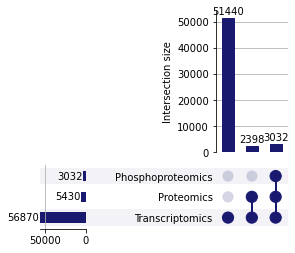

In [11]:
with plt.style.context('tableau-colorblind10'):
    plt.figure(figsize=(2, 5))
    plot(commonGenes,
         show_counts=True,
         min_subset_size=1,
         facecolor="midnightblue",
         orientation='horizontal')
    plt.savefig("figure1a_unfiltered.pdf")
    plt.savefig("figure1a_unfiltered.png", dpi=600)

# Make datasets that just have the common genes and common conditions/samples

## Common conditions

### Phosphoproteomics

In [12]:
group1 = conditions['TMT.group'] == 1
lowO2 = conditions.O2 == "Low"
noCXCL12 = conditions.CXCL12 == "No"
group2 = conditions['TMT.group'] == 2
highO2 = conditions.O2 == "High"
noCyA = conditions.CyA == "No"
phosph_common_conditions = conditions.loc[
    (group2 & highO2 & noCXCL12 & noCyA) | (group1 & lowO2 & noCXCL12),
    'Column labels - cleaned dataset'].tolist()[
        0:9]  #ignore last three samples - repeat
phosph_common_conditions.insert(0, "Gene")
print(phosph_common_conditions)

['Gene', 'Gr1_F1: 126, Sample, 1', 'Gr1_F2: 126, Sample, 1', 'Gr1_F3: 126, Sample, 1', 'Gr1_F1: 128C, Sample, 4', 'Gr1_F2: 128C, Sample, 4', 'Gr1_F3: 128C, Sample, 4', 'Gr2_F1: 128N, Control, 781', 'Gr2_F2: 128N, Control, 781', 'Gr2_F3: 128N, Control, 781']


### Proteomics

In [13]:
prot_common_conditions = [
    "Gene", "norm_19-A", "norm_19-B", "norm_19-C", "norm_1-A", "norm_1-B",
    "norm_1-C", "norm_1-1ug-A", "norm_1-1ug-B", "norm_1-1ug-C"
]

### Transcriptomics

In [14]:
transcript_common_conditions = [
    'Gene', "Ramos_19O2_NoCyclo_1", "Ramos_19O2_NoCyclo_2",
    "Ramos_19O2_NoCyclo_3", "Ramos_1O2_NoCyclo_1", "Ramos_1O2_NoCyclo_2",
    "Ramos_1O2_NoCyclo_3", "Ramos_1O2_PlusCyclo_1", "Ramos_1O2_PlusCyclo_2",
    "Ramos_1O2_PlusCyclo_3"
]

## Create datasets

In [15]:
# transcriptomics
transcript_common = transcriptomics[set(
    transcript_common_conditions).intersection(set(transcriptomics.columns))]
transcript_common.set_index("Gene", inplace=True)
#transcript_common.sort_index(inplace=True)
transcript_common = transcript_common[transcript_common.median(axis=1) > 0]

# phosphoproteomics
phospho_common = combined_clean[set(phosph_common_conditions).intersection(
    set(combined_clean))]
phospho_common.set_index("Gene", inplace=True)
#phospho_common.sort_index(inplace=True)
phospho_common = phospho_common[phospho_common.median(axis=1) > 0]

# proteomics
prot_common = proteomics[set(prot_common_conditions).intersection(
    set(proteomics.columns))]
prot_common.set_index("Gene", inplace=True)
#prot_common.sort_index(inplace=True)
prot_common = prot_common[prot_common.median(axis=1) > 0]

In [16]:
phospho_common.to_csv("bonita_phosphoproteomics.csv")
prot_common.to_csv("bonita_proteomics.csv")
transcript_common.to_csv("bonita_transcriptomics.csv")
print(phospho_common.shape, transcript_common.shape, prot_common.shape)

(2271, 9) (17396, 9) (5160, 9)


In [17]:
pd.concat([transcript_common, phospho_common, prot_common], axis = 1).fillna(0).to_csv("concatenated_datasets.csv")

# Make figures showing overlap in genes, using filtered datasets

<Figure size 144x360 with 0 Axes>

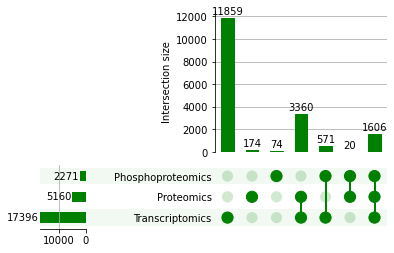

In [18]:
commonGenes = from_contents({
    'Proteomics': set(prot_common.index),
    'Transcriptomics': set(transcript_common.index),
    'Phosphoproteomics': set(phospho_common.index)
})
commonGenes
with plt.style.context('tableau-colorblind10'):
    plt.figure(figsize=(2, 5))
    plot(commonGenes,
         show_counts=True,
         min_subset_size=1,
         facecolor="green",
         orientation='horizontal')
    plt.savefig("figure1a_filtered.pdf")
    plt.savefig("figure1a_filtered.png", dpi=600)

In [49]:
commonGene = list(
    set(
        set(prot_common.index) & set(transcript_common.index)
        & set(phospho_common.index)))

transcript_common = transcript_common.loc[transcript_common.index.isin(
    commonGene)]
phospho_common = phospho_common.loc[phospho_common.index.isin(commonGene)]
prot_common = prot_common.loc[prot_common.index.isin(commonGene)]

print(transcript_common.shape, phospho_common.shape, prot_common.shape)

(1606, 9) (1606, 9) (1606, 9)


# Calculate pairwise correlations between datasets

In [ ]:
temp = transcript_common.reset_index(drop=False).melt(id_vars='Gene')
temp['Condition'] = [i[:-2] for i in temp.variable]
for i in range(len(temp['Condition'])):
    if temp.loc[i, 'Condition'] == 'Ramos_19O2_NoCyclo':
        temp.loc[i, 'Condition'] = "19% O2, CyA-"
    elif temp.loc[i, 'Condition'] == 'Ramos_1O2_NoCyclo':
        temp.loc[i, 'Condition'] = "1% O2, CyA-"
    elif temp.loc[i, 'Condition'] == 'Ramos_1O2_PlusCyclo':
        temp.loc[i, 'Condition'] = "1% O2, CyA+"
a = pd.DataFrame(temp.groupby(['Condition', 'Gene']).median())  #.reset_index()
a

In [ ]:
temp2 = temp[['variable', 'Condition']].drop_duplicates().reset_index(drop=True)
temp2['O2'] = [i[:-6] for i in temp2.Condition]
temp2['CyA'] = [i[-4:] for i in temp2.Condition]
for i in set(temp2.Condition):
    temp2[i] = np.nan
    for j in range(len(temp2)):
        if (temp2.loc[j, 'Condition'] == i):
            temp2.loc[j, i] = 1
        else:
            temp2.loc[j, i] = 0
temp2[["1% O2, CyA+","1% O2, CyA-","19% O2, CyA-"]].to_csv("transcriptomics_conditions.csv")
temp2

In [ ]:
temp2.to_csv("transcriptomics_conditions_deseq.csv", index=False)

In [ ]:
temp = phospho_common.reset_index(drop=False).melt(id_vars='Gene')
temp.columns = ['Gene', 'Condition', 'value']
for i in range(len(temp['Condition'])):
    oldcond = temp.loc[i, 'Condition']
    newcond = ''
    if conditions.loc[conditions['Column labels - cleaned dataset'] == oldcond,
                      "O2"].tolist()[0] == "Low":
        newcond = newcond + "1% O2, "
    else:
        newcond = newcond + "19% O2, "
    if conditions.loc[conditions['Column labels - cleaned dataset'] == oldcond,
                      "CyA"].tolist()[0] == "No":
        newcond = newcond + "CyA-"
    else:
        newcond = newcond + "CyA+"
    temp.loc[i, 'Condition'] = newcond
    temp.loc[i, 'variable'] = oldcond
b = pd.DataFrame(temp.groupby(['Condition', 'Gene']).median())  #.reset_index()
b

In [ ]:
b

In [ ]:
temp2 = temp[['variable', 'Condition']].drop_duplicates().reset_index(drop=True)
temp2['O2'] = [i[:-6] for i in temp2.Condition]
temp2['CyA'] = [i[-4:] for i in temp2.Condition]
for i in set(temp2.Condition):
    temp2[i] = np.nan
    for j in range(len(temp2)):
        if (temp2.loc[j, 'Condition'] == i):
            temp2.loc[j, i] = 1
        else:
            temp2.loc[j, i] = 0
temp2[["1% O2, CyA+","1% O2, CyA-","19% O2, CyA-"]].to_csv("phosphoproteomics_conditions.csv")
temp2

In [ ]:
temp = prot_common.reset_index(drop=False).melt(id_vars='Gene')
temp['Condition'] = [i[:-2] for i in temp.variable]

for i in range(len(temp['Condition'])):
    if temp.loc[i, 'Condition'] == 'norm_19':
        temp.loc[i, 'Condition'] = "19% O2, CyA-"
    elif temp.loc[i, 'Condition'] == 'norm_1':
        temp.loc[i, 'Condition'] = "1% O2, CyA-"
    elif temp.loc[i, 'Condition'] == 'norm_1-1ug':
        temp.loc[i, 'Condition'] = "1% O2, CyA+"

c = pd.DataFrame(temp.groupby(['Condition', 'Gene']).median())
c

In [ ]:
temp2 = temp[['variable', 'Condition']].drop_duplicates().reset_index(drop=True)
temp2['O2'] = [i[:-6] for i in temp2.Condition]
temp2['CyA'] = [i[-4:] for i in temp2.Condition]
for i in set(temp2.Condition):
    temp2[i] = np.nan
    for j in range(len(temp2)):
        if (temp2.loc[j, 'Condition'] == i):
            temp2.loc[j, i] = 1
        else:
            temp2.loc[j, i] = 0
temp2[["1% O2, CyA+","1% O2, CyA-","19% O2, CyA-"]].to_csv("proteomics_conditions.csv", index=False)
temp2

In [ ]:
medianDF = pd.DataFrame({
    "Transcriptomics": a.value,
    "Proteomics": c.value,
    "Phosphoproteomics": b.value
}).reset_index()
medianDF

In [ ]:
g = sns.pairplot(medianDF,
                 diag_kind='hist',
                 kind='reg',
                 plot_kws={'scatter_kws': {
                     'alpha': 0.25
                 }},
                 markers=["o", "s", "D"],
                 corner=False,
                 hue='Condition',
                 palette='colorblind')
g.savefig("figure1b.pdf")
g.savefig("figure1b.png", dpi=600)

In [ ]:
a = prot_common.T.reset_index(drop=True).corrwith(
    transcript_common.T.reset_index(drop=True), axis=0)
sns.histplot(a, color="blue")
b = phospho_common.T.reset_index(drop=True).corrwith(
    transcript_common.T.reset_index(drop=True), axis=0)
sns.histplot(b, color="red")
c = phospho_common.T.reset_index(drop=True).corrwith(
    prot_common.T.reset_index(drop=True), axis=0)
sns.histplot(c, color="brown")

In [ ]:
a = transcript_common.reset_index(drop=False).melt(
    id_vars="Gene").sort_values("Gene")
b = prot_common.reset_index(drop=False).melt(
    id_vars="Gene").sort_values("Gene")
c = phospho_common.reset_index(drop=False).melt(
    id_vars="Gene").sort_values("Gene")

In [ ]:
from scipy.stats import spearmanr, pearsonr
print(spearmanr(a.value, b.value), pearsonr(a.value, b.value))

In [ ]:
print(spearmanr(a.value, c.value), pearsonr(a.value, c.value))

In [ ]:
print(spearmanr(b.value, c.value), pearsonr(b.value, c.value))

# Make proteomics coexpression network

In [ ]:
proteomics_coexp = proteomics[set(
    prot_common_conditions).intersection(set(proteomics.columns))]
proteomics_coexp.set_index("Gene", inplace=True)
proteomics_coexp = proteomics_coexp.T
proteomics_coexp = proteomics_coexp.corr(method="spearman")
proteomics_coexp.head
proteomics_coexp.to_csv("proteomics_corr.csv")

In [ ]:
proteomics_coexp = pd.read_csv("proteomics_corr.csv", index_col=0)
proteomics_coexp['Gene'] = list(proteomics_coexp.index)
proteomics_coexp = proteomics_coexp.melt(id_vars=['Gene']).dropna()
proteomics_coexp.value = proteomics_coexp.value.abs()
proteomics_coexp = proteomics_coexp[proteomics_coexp.value >= 0.75]
proteomics_coexp = proteomics_coexp[proteomics_coexp.value != 1]
#proteomics_coexp.head
proteomics_net = nx.from_pandas_edgelist(proteomics_coexp,
                                         source="Gene",
                                         target="variable",
                                         edge_attr="value")
nx.set_node_attributes(proteomics_net,
                       nx.betweenness_centrality(proteomics_net),
                       "prot_betweenness")
#Gcc = sorted(nx.connected_components(proteomics_net), key=len, reverse=True)
#proteomics_net = proteomics_net.subgraph(Gcc[0])
nx.write_graphml_lxml(proteomics_net, "proteomics_net.graphml")
len(proteomics_net)
proteomics_net = nx.read_graphml("proteomics_net.graphml")
len(proteomics_net)

# Make transcriptomics coexpression network

In [ ]:
transcriptomics_coexp = transcriptomics[set(
    transcript_common_conditions).intersection(set(transcriptomics.columns))]
transcriptomics_coexp = transcriptomics_coexp.T
transcriptomics_coexp = transcriptomics_coexp.corr(method="spearman")
transcriptomics_coexp.head
transcriptomics_coexp.to_csv("transcriptomics_corr.csv")

In [ ]:
transcriptomics_coexp = pd.read_csv("transcriptomics_corr.csv", index_col=0)
transcriptomics_coexp['Gene'] = list(transcriptomics_coexp.index)
transcriptomics_coexp = transcriptomics_coexp.melt(id_vars=['Gene']).dropna()
transcriptomics_coexp.value = transcriptomics_coexp.value.abs()
transcriptomics_coexp = transcriptomics_coexp[
    transcriptomics_coexp.value >= 0.75]
transcriptomics_coexp = transcriptomics_coexp[transcriptomics_coexp.value != 1]


transcriptomics_net = nx.from_pandas_edgelist(transcriptomics_coexp,
                                              source="Gene",
                                              target="variable",
                                              edge_attr="value")
nx.set_node_attributes(transcriptomics_net,
                       nx.betweenness_centrality(transcriptomics_net),
                       "trans_betweenness")
#Gcc = sorted(nx.connected_components(transcriptomics_net), key=len, reverse=True)
#transcriptomics_net = transcriptomics_net.subgraph(Gcc[0])
nx.write_graphml_lxml(transcriptomics_net, "transcriptomics_net.graphml")
len(transcriptomics_net)

# Make phosphoproteomics coexpression network

In [ ]:
phospho_coexp = phosphoproteomics[set(
    phospho_common_conditions).intersection(set(phosphoproteomics.columns))]
phospho_coexp = phospho_coexp.T
phospho_coexp = phospho_coexp.corr(method="spearman")
phospho_coexp.head
phospho_coexp.to_csv("phospho_corr.csv")

In [ ]:
phospho_coexp = pd.read_csv("phospho_corr.csv", index_col=0)
phospho_coexp['Gene'] = list(phospho_coexp.index)
phospho_coexp = phospho_coexp.melt(id_vars=['Gene']).dropna()
phospho_coexp.value = phospho_coexp.value.abs()
phospho_coexp = phospho_coexp[phospho_coexp.value >= 0.75]
phospho_coexp = phospho_coexp[phospho_coexp.value != 1]

phospho_net = nx.from_pandas_edgelist(phospho_coexp,
                                      source="Gene",
                                      target="variable",
                                      edge_attr="value")
nx.set_node_attributes(phospho_net, nx.betweenness_centrality(phospho_net),
                       "phospho_betweenness")
#Gcc = sorted(nx.connected_components(phospho_net), key=len, reverse=True)
#phospho_net = phospho_net.subgraph(Gcc[0])
nx.write_graphml_lxml(phospho_net, "phospho_net.graphml")


# Find edges overlapping between coexpression networks

In [ ]:
def getOverlapGraph(netList=[], returnGiantComponent=True):
    overlapNet = nx.intersection_all(netList)
    if returnGiantComponent:
        Gcc = sorted(nx.connected_components(overlapNet), key=len, reverse=True)
        G0 = overlapNet.subgraph(Gcc[0])
        return G0
    else:
        return overlapNet

In [ ]:
# transcriptomics - proteomics 
trans_prot = getOverlapGraph(netList=[transcriptomics_net, proteomics_net])
print(len(trans_prot))

In [ ]:
# transcriptomics - phosphoproteomics 
trans_phospho = getOverlapGraph(netList=[transcriptomics_net, phospho_net])
print(len(trans_phospho))

In [ ]:
# phosphoproteomics - proteomics
prot_phospho = getOverlapGraph(netList=[proteomics_net, phospho_net])
print(len(prot_phospho))

In [ ]:
# make consensus network

consensus_net = getOverlapGraph(netList=[transcriptomics_net, proteomics_net, phospho_net], returnGiantComponent=False)

nx.set_node_attributes(consensus_net, nx.betweenness_centrality(consensus_net), "consensus_betweenness")

nx.write_graphml_lxml(consensus_net, "consensus_net.graphml")

consensus_net_giant = getOverlapGraph(netList=[transcriptomics_net, proteomics_net, phospho_net], returnGiantComponent=True)

nx.write_graphml_lxml(consensus_net_giant, "consensus_net_largest_connected_component.graphml")

print(len(consensus_net_giant))

In [ ]:
# make upset plot showing intersections between coexpression network edges

commonNodes = from_contents({
    'Proteomics': set(proteomics_net.edges),
    'Transcriptomics': set(transcriptomics_net.edges),
    'Phosphoproteomics': set(phospho_net.edges)
})
with plt.style.context('tableau-colorblind10'):
    plt.figure(figsize=(2, 5))
    plot(commonNodes,
         show_counts=True,
         min_subset_size=1,
         facecolor="navy",
         orientation='horizontal')
    plt.savefig("figure2c.pdf")
    plt.savefig("figure2c.png", dpi=600)

In [ ]:
def enrichmentNodes(networkNodes):
    consensusNodesEnrich = gp.enrichr(gene_list=list(networkNodes),
                                      gene_sets=['KEGG_2021_Human'],
                                      organism='Human',
                                      cutoff=0.05)
    consensusNodesEnrich.results.Genes = [
        temp.split(';') for temp in consensusNodesEnrich.results.Genes.tolist()
    ]
    enrichr_common_nodes = consensusNodesEnrich.results[
        consensusNodesEnrich.results['Adjusted P-value'] < 0.01]
    enrichr_common_nodes = enrichr_common_nodes.assign(
        log10_adjusted_p_value=[(-1) * np.log10(i)
                                for i in enrichr_common_nodes['Adjusted P-value']])
    return enrichr_common_nodes

def makeEnrichBubblePlot(enrichResult):
    with plt.style.context('tableau-colorblind10'):
        sns.set_context(
        "paper",
        rc={
        "font.size": 16,
        "axes.labelsize": 'medium',
        'ytick.labelsize': 'medium',
        'xtick.labelsize': 'medium',
        'axes.titlesize': 'medium',
        'legend.fontsize': 'medium',
        })
        sns.scatterplot(data=enrichResult,
                        y="Term",
                        x="log10_adjusted_p_value",
                        palette="Blues", s = 75)
        plt.xlabel("-log10 (adjusted p-value)")
        plt.ylabel("")
        axes = plt.gca()
        axes.yaxis.grid(color='grey',
                    linestyle=(0, (5, 10)),
                    linewidth=0.5)
        axes.xaxis.grid(color='grey',
                    linestyle=(0, (5, 10)),
                    linewidth=0.5)
        plt.xticks(range(0,ceil(max(enrichResult["log10_adjusted_p_value"])+1)))

In [ ]:
# consensus network
consensusNodesEnrich = enrichmentNodes(consensus_net_giant.nodes)
plt.figure(figsize=(3,4))
makeEnrichBubblePlot(consensusNodesEnrich)

In [ ]:
# proteomics only
len(set(transcriptomics_net.nodes))# - set(transcriptomics_net.nodes)) #.difference(set(phospho_net.nodes)))
#proteomics_net.subgraph(proteomics_net.nodes.in)
#proteomicsNodesEnrich = enrichmentNodes(G0.nodes)
#plt.figure(figsize=(5,10))
#makeEnrichBubblePlot(proteomicsNodesEnrich)

In [ ]:
# transcriptomics only
overlapNet = nx.difference(transcriptomics_net, consensus_net.subgraph(transcriptomics_net.nodes))
Gcc = sorted(nx.connected_components(overlapNet), key=len, reverse=True)
G0 = overlapNet.subgraph(Gcc[0])
transcriptomicsNodesEnrich = enrichmentNodes(G0.nodes)
plt.figure(figsize=(5,10))
makeEnrichBubblePlot(transcriptomicsNodesEnrich)

In [ ]:
# phosphoproteomics only
phosphoproteomicsNodesEnrich = enrichmentNodes(set(phospho_net.nodes) - set(consensus_net_giant.nodes))
plt.figure(figsize=(3,10))
makeEnrichBubblePlot(phosphoproteomicsNodesEnrich)

In [ ]:
len(set(phospho_net.nodes) - set(consensus_net_giant.nodes))
len(set(proteomics_net.nodes) - set(consensus_net_giant.nodes))